Problem 1:
A table containing grades earned by students in respective
courses is made available to you in (codes folder). Consider
grades earned in each of the courses as random variables and
learn the dependencies between courses.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,EC100,EC160,IT101,IT161,MA101,PH100,PH160,HS101,QP
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,BC,CC,BB,BC,CC,BC,AA,BB,y
2,CC,BC,BB,BB,CC,BC,AB,BB,y
3,AB,BB,AB,AB,BB,CC,BC,AB,y
4,BC,CC,BB,BB,BB,BB,BC,BB,y
5,BC,AB,CD,BC,BC,BC,BC,CD,y
6,DD,CC,DD,CD,CD,CC,BC,BC,n


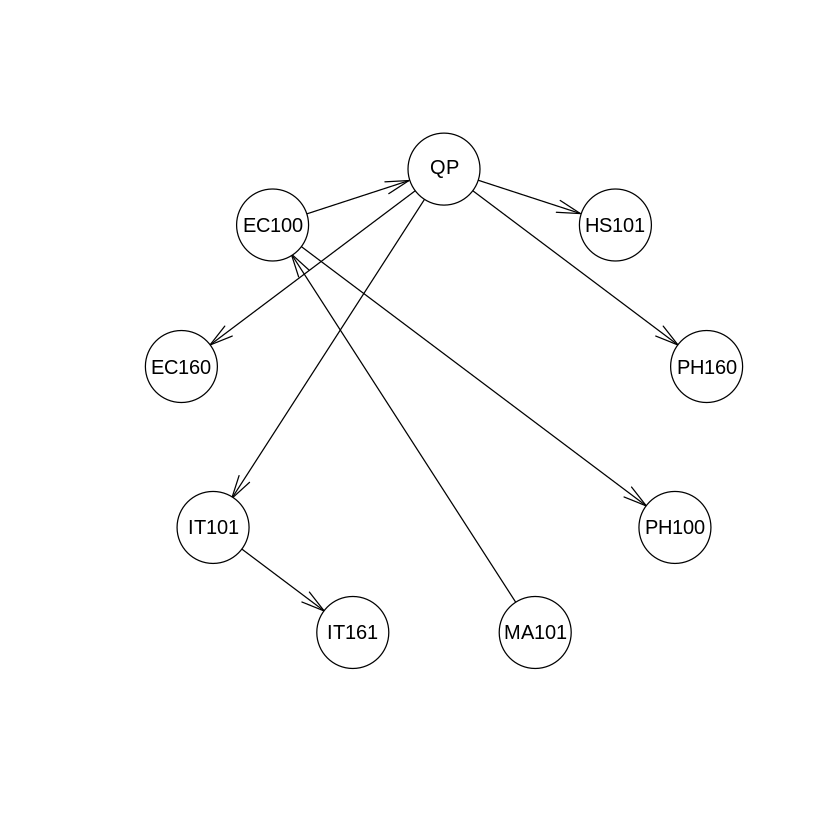

In [ ]:
# Load required packages
install.packages("googledrive")
library("googledrive")
install.packages("bnlearn")
library(bnlearn)

# Define possible grade values
grades <- c("AA", "AB", "BB", "BC", "CC", "CD", "DD", "F")

# Load course grades data
course.grades <- read.table("/2020_bn_nb_data.txt", head = TRUE)
head(course.grades)

# Convert columns to factors
course.grades <- lapply(course.grades, as.factor)
course.grades <- data.frame(course.grades)

# Build a Bayesian network using hill-climbing algorithm and K2 score metric
course.grades.net <- hc(course.grades, score = "k2")

# Visualize the Bayesian network
plot(course.grades.net)





Problem 2: Using the data, learn the CPTs for each course node.

In [ ]:
course.grades.bn.fit <- bn.fit(course.grades.net, course.grades )
print(course.grades.bn.fit)
prob <- 0.0
ans = ""


  Bayesian network parameters

  Parameters of node EC100 (multinomial distribution)

Conditional probability table:
 
     MA101
EC100         AA         AB         BB         BC         CC         CD
   AA 0.75000000 0.07692308 0.03846154 0.01851852 0.00000000 0.00000000
   AB 0.00000000 0.46153846 0.25000000 0.05555556 0.00000000 0.00000000
   BB 0.25000000 0.23076923 0.32692308 0.22222222 0.04081633 0.00000000
   BC 0.00000000 0.15384615 0.28846154 0.27777778 0.32653061 0.00000000
   CC 0.00000000 0.07692308 0.09615385 0.24074074 0.32653061 0.04166667
   CD 0.00000000 0.00000000 0.00000000 0.12962963 0.26530612 0.33333333
   DD 0.00000000 0.00000000 0.00000000 0.03703704 0.04081633 0.50000000
   F  0.00000000 0.00000000 0.00000000 0.01851852 0.00000000 0.12500000
     MA101
EC100         DD          F
   AA 0.00000000 0.00000000
   AB 0.00000000 0.00000000
   BB 0.00000000 0.00000000
   BC 0.00000000 0.00000000
   CC 0.00000000 0.00000000
   CD 0.04761905 0.00000000
   DD 0.190476

Problem 3:
What grade will a student get in PH100 if he earns DD in
EC100, CC in IT101 and CD in MA101

In [ ]:
for(value in grades) {
  p <- cpquery(course.grades.bn.fit, event = (PH100== value), evidence = (EC100=="DD" & IT101=="CC" & MA101=="CD"))
  if(p > prob) {
    ans <- value
    prob <- p
  }
}
print(ans)

[1] "CD"


Problem 4: The last column in the data file indicates whether a student
qualifies for an internship program or not. From the given
data, take 70 percent data for training and build a naive Bayes
classifier (considering that the grades earned in different
courses are independent of each other) which takes in the
student’s performance and returns the qualification status
with a probability. Test your classifier on the remaining 30
percent data. Repeat this experiment for 20 random selection
of training and testing data. Report results about the accuracy
of your classifier.

For n=1

In [ ]:
install.packages("e1071")
install.packages("caret")
library(caret)
library(e1071)
set.seed(100)
tIndex <- createDataPartition(course.grades$QP, p=0.7)$Resample1
train <- course.grades[tIndex, ]
test <- course.grades[-tIndex, ]


nbc <- naiveBayes(QP~EC100+EC160+IT101+IT161+MA101+PH100+PH160+HS101, data = train)

printALL = function(model) {
  trainPred = predict(model, newdata = train, type = "class")
  trainTable = table(train$QP, trainPred)
  testPred = predict(nbc, newdata = test, type = "class")
  testTable = table(test$QP, testPred)
  trainAcc = (trainTable[1,1]+trainTable[2,2])/sum(trainTable)
  testAcc = (testTable[1,1]+testTable[2,2])/sum(testTable)
  message("Accuracy")
  cat("\nTraining Accuracy:", round(trainAcc, 4))
  cat("\nTest Accuracy:", round(testAcc, 4))
}

printALL(nbc)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Accuracy




Training Accuracy: 0.9939
Test Accuracy: 0.9855

for n=20

In [ ]:
# Install and load required packages
install.packages("e1071")
install.packages("caret")
library(caret)
library(e1071)

# Set seed for reproducibility
set.seed(100)

# Load data
course.grades <- read.table("/2020_bn_nb_data.txt", header = TRUE)

# Convert columns to factors
course.grades <- lapply(course.grades, as.factor)
course.grades <- data.frame(course.grades)

# Define function to train and test the classifier and print accuracy
printAccuracy <- function(trainIndex, testIndex) {
  
  # Split data into training and testing sets
  train <- course.grades[trainIndex, ]
  test <- course.grades[testIndex, ]
  
  # Train Naive Bayes classifier
  nbc <- naiveBayes(QP ~ EC100 + EC160 + IT101 + IT161 + MA101 + PH100 + PH160 + HS101, data = train)
  
  # Make predictions on training and testing sets
  trainPred <- predict(nbc, newdata = train, type = "class")
  testPred <- predict(nbc, newdata = test, type = "class")
  
  # Create confusion matrix for training and testing sets
  trainTable <- table(train$QP, trainPred)
  testTable <- table(test$QP, testPred)
  
  # Calculate accuracy for training and testing sets
  trainAcc <- sum(diag(trainTable)) / sum(trainTable)
  testAcc <- sum(diag(testTable)) / sum(testTable)
  
  # Return accuracy results as a data frame
  return(data.frame("Training Accuracy" = trainAcc, "Test Accuracy" = testAcc))
}

# Create empty data frame to store accuracy results
accuracyResults <- data.frame(matrix(ncol = 2, nrow = 20))
colnames(accuracyResults) <- c("Training Accuracy", "Test Accuracy")

# Repeat experiment for 20 random selections of training and testing data
for (i in 1:20) {
  # Create random indexes for training and testing sets
  tIndex <- createDataPartition(course.grades$QP, p = 0.7, list = FALSE)
  trainIndex <- tIndex
  testIndex <- setdiff(1:nrow(course.grades), trainIndex)
  
  # Calculate accuracy and store results in data frame
  accuracyResults[i, ] <- printAccuracy(trainIndex, testIndex)
}

# Print mean and standard deviation of accuracy results
cat("\nMean Training Accuracy:", round(mean(accuracyResults$`Training Accuracy`), 4))
cat("\nMean Test Accuracy:", round(mean(accuracyResults$`Test Accuracy`), 4))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Mean Training Accuracy: 0.9908
Mean Test Accuracy: 0.9746

 Problem 5:
Repeat 4, considering that the grades earned in different
courses may be dependent.

In [ ]:
library(bnlearn)
library(caret)
# Learn network structure and conditional probability tables
course.grades.net <- hc(course.grades, score = "k2")
course.grades.bn.fit <- bn.fit(course.grades.net, course.grades)

# Repeat experiment 20 times and store accuracy results
train_acc <- numeric(20)
test_acc <- numeric(20)

for (i in 1:20) {
  # Split data into training and testing sets
  set.seed(i)
  tIndex <- createDataPartition(course.grades$QP, p=0.7, list=FALSE)
  train <- course.grades[tIndex, ]
  test <- course.grades[-tIndex, ]
  
  # Learn conditional probability tables from training data
  train_da <- bn.fit(hc(train, score="k2"), train)
  
  # Predict qualification status on both training and testing data
  train_pred <- predict(train_da, node="QP", data=train)
  test_pred <- predict(train_da, node="QP", data=test)
  
  # Calculate accuracy on training and testing data
  train_table <- table(train$QP, train_pred)
  train_acc[i] <- sum(diag(train_table)) / sum(train_table)
  
  test_table <- table(test$QP, test_pred)
  test_acc[i] <- sum(diag(test_table)) / sum(test_table)
}

# Print mean accuracy over 20 experiments
cat("Training accuracy: ", mean(train_acc), "\n")
cat("Test accuracy: ", mean(test_acc), "\n")



Warning message in check.data(x):
“variable PH160 has levels that are not observed in the data.”
Warning message in check.data(data, allow.missing = TRUE):
“variable PH160 has levels that are not observed in the data.”
Warning message in check.data(x):
“variable IT161 has levels that are not observed in the data.”
Warning message in check.data(x):
“variable PH160 has levels that are not observed in the data.”
Warning message in check.data(data, allow.missing = TRUE):
“variable IT161 has levels that are not observed in the data.”
Warning message in check.data(data, allow.missing = TRUE):
“variable PH160 has levels that are not observed in the data.”


Training accuracy:  0.9079755 
Test accuracy:  0.8823491 
